In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle as shuffle_arrays
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

plt.style.use('default')
plt.rcParams['figure.dpi'] = 50

## Exercises

1. Train a perceptron using the Widrow-Hoff algorithm on the following training data for `30 epochs`
   and with the `learning rate = 0.1`.

   What is the accuracy on the training data?

   Call the `plot_decision_boundary()` function at each step of the algorithm to show the decision boundary.

    #### a)
    `X_train = [[0, 0], [0, 1], [1, 0], [1, 1]]`

    `y_train = [-1, 1, 1, 1]`

    #### b)
    `X_train = [[0, 0], [0, 1], [1, 0], [1, 1]]`

    `y_train = [-1, 1, 1, -1]`


2. Train a neural network to solve the `XOR` problem with the network architecture described at `1b)`
   and the `gradient descent algorithm`. Train for `50 epochs` and with `learning rate = 0.1`,
   `mean = 0`, `standard deviation = 1`, and `5 neurons` on the hidden layer.

   Print the `accuracy score` at each epoch.

   Call the `plot_decision_boundary()` function at each step of the algorithm to show the decision boundary.

![XOR problem](image.png)


In [2]:
def compute_y(x, W, bias):
    # decision boundary
    # [x, y] * [W[0], W[1]] + b = 0
    return (-x * W[0] - bias) / (W[1] + 1e-10)

In [3]:
def plot_decision_boundary(X, y , W, b, current_x, current_y):
    x1 = -0.5
    y1 = compute_y(x1, W, b)
    x2 = 1.5
    y2 = compute_y(x2, W, b)

    # delete the window content
    plt.clf()

    # plotting the training set
    color = 'r'
    if current_y == -1:
        color = 'b'
    plt.ylim((-1, 2))
    plt.xlim((-1, 2))
    plt.plot(X[y == -1, 0], X[y == -1, 1], 'b+')
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'r+')

    # plotting the current example
    plt.plot(current_x[0], current_x[1], color+'s')

    # plotting decision boundary
    plt.plot([x1, x2] ,[y1, y2], 'black')
    plt.show(block=False)
    plt.pause(0.3)

In [4]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def tanh_derivative(x):
    return 1.0 - np.tanh(x) * np.tanh(x)

### Exercise 1.

In [5]:
def train(X_train, y_train, epochs=5, learning_rate=0.001, shuffle=True, verbose=True, plotting=True):
    """
    Train a perceptron using Widrow-Hoff

    :param X_train: training data
    :param y_train: training labels
    :param epochs: number of epochs
    :param learning_rate: the learning rate
    :param shuffle: if we want to shuffle the data at the beginning of each epoch
    :param verbose: if we want to show the accuracy on the training data after each epoch
    :param plotting: if we want to plot the decision boundary at each epoch
    :return: return trained W and b
    """
    num_weighs = X_train.shape[1]
    miu = 0.0
    sigma = 0.15
    W = np.random.normal(miu, sigma, num_weighs)
    b = np.zeros(1)

    for e in range(epochs):
        if shuffle:
            X_train, y_train = shuffle_arrays(X_train, y_train)
        for x, y in zip(X_train, y_train):
            y_hat = np.dot(x, W) + b
            # loss = (y - y_hat) * (y - y_hat) / 2.0
            W = W - learning_rate * (y_hat - y) * x
            b = b - learning_rate * (y_hat - y)

        if plotting:
            plt.title("Epoch " + str(e + 1))
            plot_decision_boundary(X_train, y_train, W, b, x, y)
        if verbose:
            print(f'accuracy {e}:', (y_train == np.round(sigmoid(X_train.dot(W) + b))).mean())

    if verbose:
        print('accuracy', (y_train == np.round(sigmoid(X_train.dot(W) + b))).mean())

#### Extra - train breast cancer dataset

In [6]:
# Extra
data = load_breast_cancer()
X_train, y_train = data.data, data.target

print(X_train.shape, y_train.shape)
print(y_train[:100])
print(X_train[:3])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

train(X_train, y_train, epochs=10, learning_rate=0.01, shuffle=True, verbose=True, plotting=False)

(569, 30) (569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0]
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4

### Exercise 1 a)

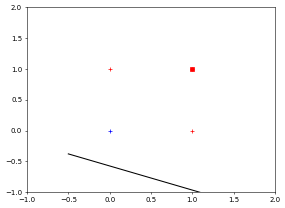

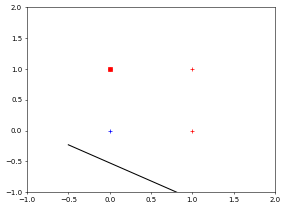

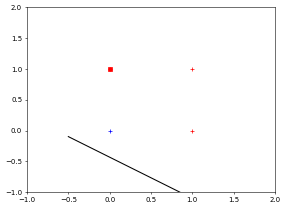

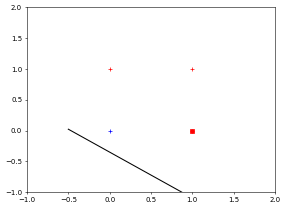

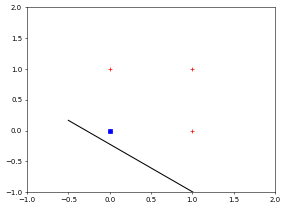

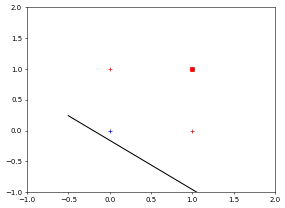

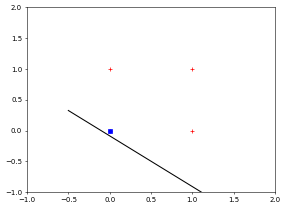

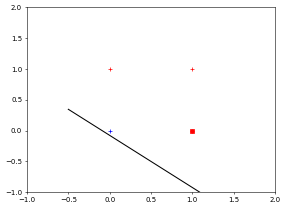

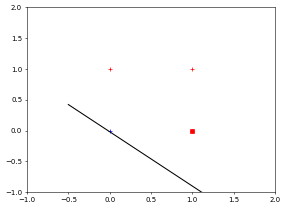

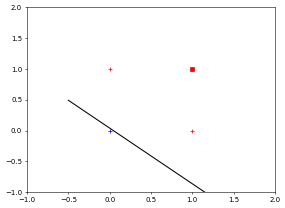

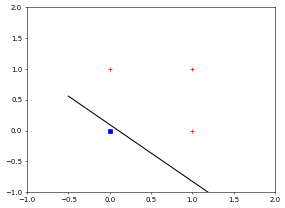

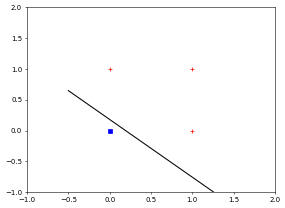

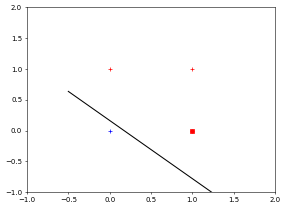

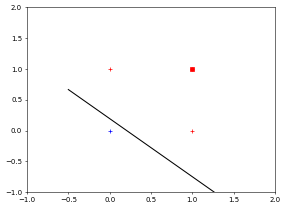

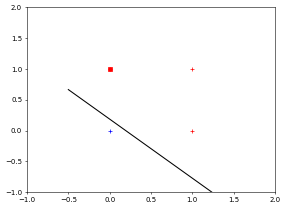

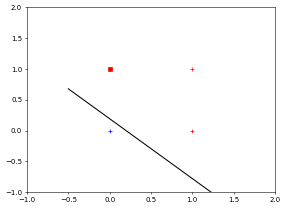

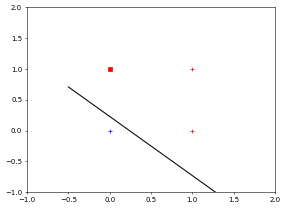

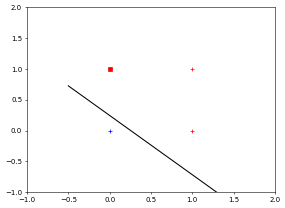

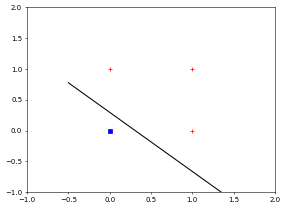

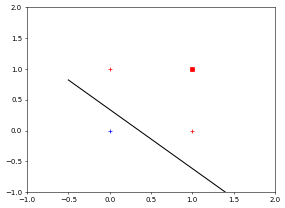

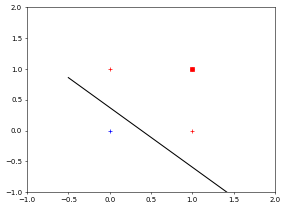

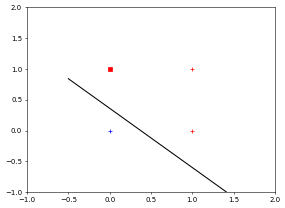

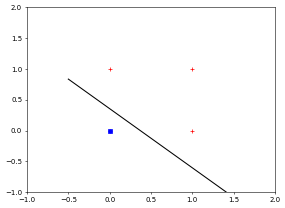

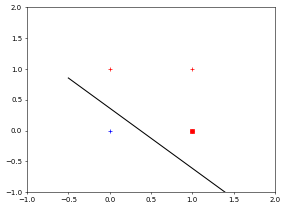

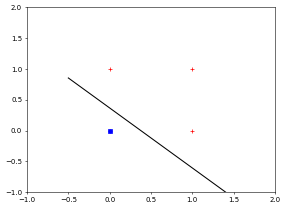

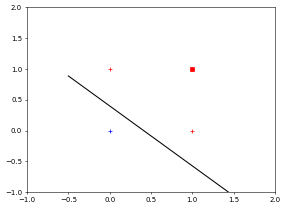

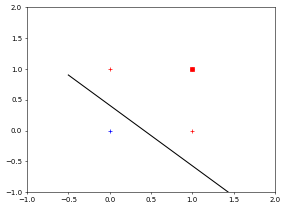

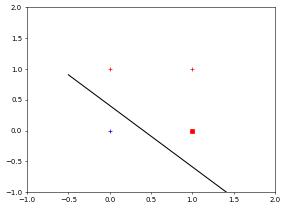

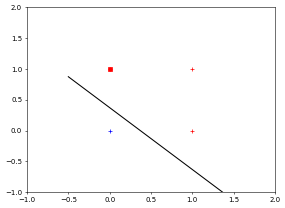

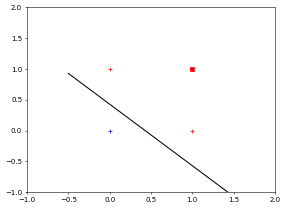

In [7]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, 1, 1, 1])

train(X, y, epochs=30, learning_rate=0.1, shuffle=True, verbose=False)

### Exercise 1 b)

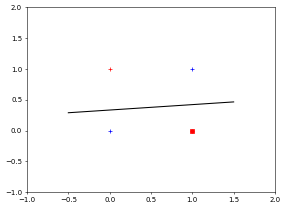

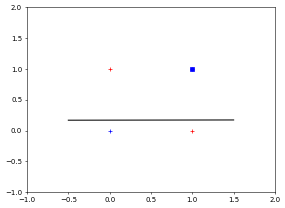

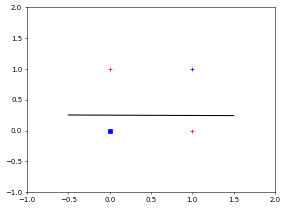

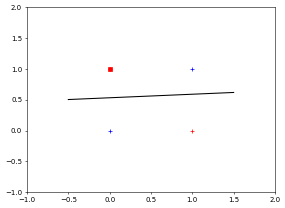

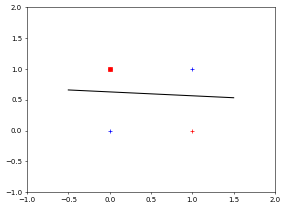

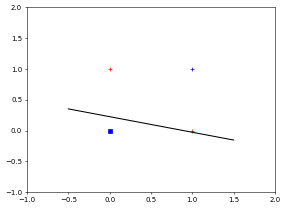

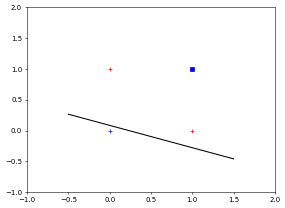

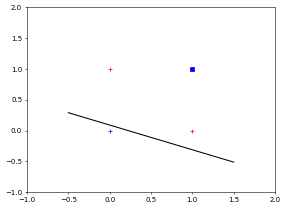

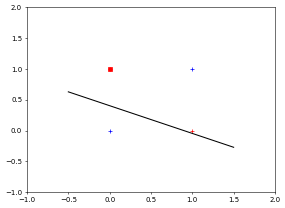

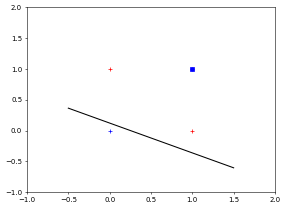

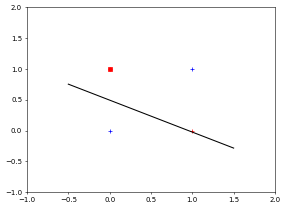

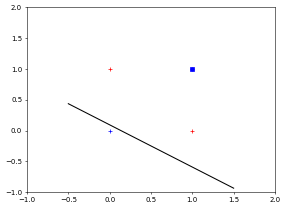

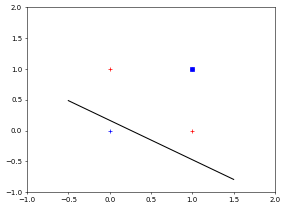

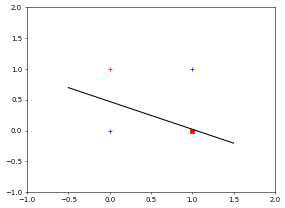

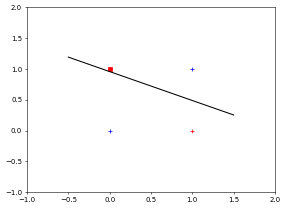

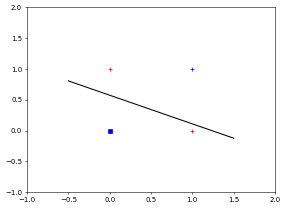

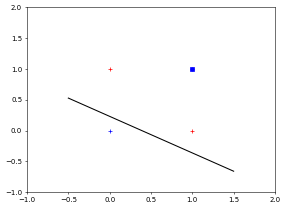

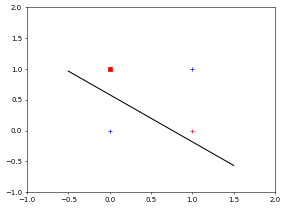

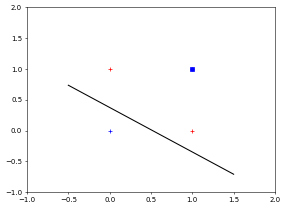

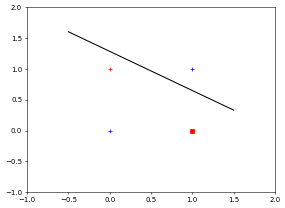

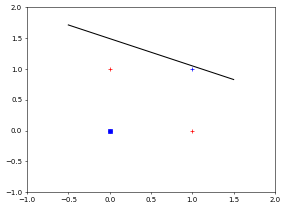

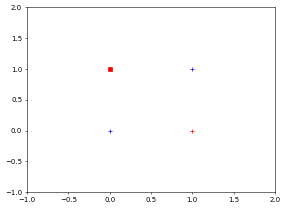

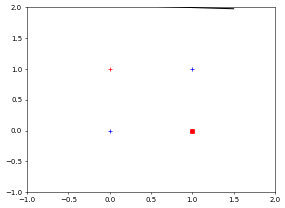

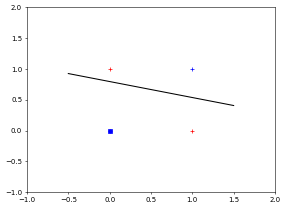

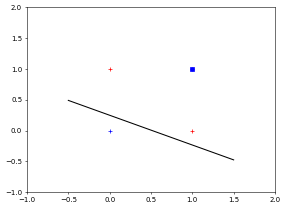

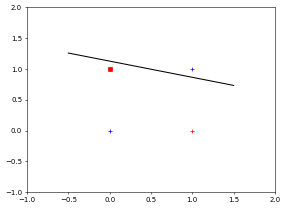

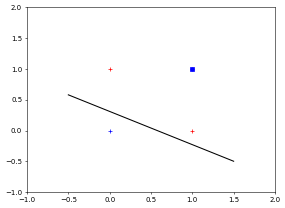

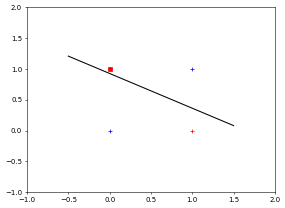

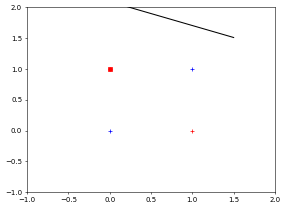

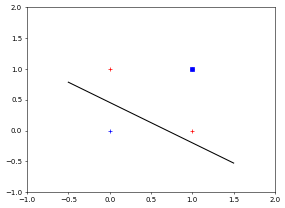

In [8]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, 1, 1, -1])

train(X, y, epochs=30, learning_rate=0.1, shuffle=True, verbose=False)

### Exercise 2.

Updated code - using the Xavier initialization:

standard deviation = $\frac{1}{numHiddenNeurons}$

In [9]:
def forward(X, W_1, b_1, W_2, b_2): # PDF
    z_1 = X.dot(W_1) + b_1 # Nx2 * 2x5 = Nx5
    a_1 = np.tanh(z_1) # Nx5
    z_2 = a_1.dot(W_2) + b_2 # Nx5 * 5x1 = Nx1
    a_2 = sigmoid(z_2) # Nx1
    return z_1, a_1, z_2, a_2

def backward(a_1, a_2, z_1, W_2, X, y, num_samples): # PDF
    dz_2 = a_2 - y # derivative of the loss function (logistic loss) as a function of z
    dw_2 = (a_1.T.dot(dz_2)) / num_samples # der(L/w_2) = der(L/z_2) * der(dz_2/w_2) = dz_2 * der((a_1 * W_2 + b_2)/ W_2)
    db_2 = np.sum(dz_2) / num_samples # der(L/b_2) = der(L/z_2) * der(z_2/b_2) = dz_2 * der((a_1 * W_2 + b_2)/ b_2) # the first layer
    da_1 = dz_2 * W_2.T # der(L/a_1) = der(L/z_2) * der(z_2/a_1) = dz_2 * der((a_1 * W_2 + b_2)/ a_1)
    dz_1 = da_1 * tanh_derivative(z_1) # der(L/z_1) = der(L/a_1) * der(a_1/z1) = da_1 .* der((tanh(z_1))/ z_1)
    dw_1 = X.T.dot(dz_1) / num_samples # der(L/w_1) = der(L/z_1) * der(z_1/w_1) = dz_1 * der((X * W_1 + b_1)/ W_1)
    db_1 = np.sum(dz_1) / num_samples # der(L/b_1) = der(L/z_1) * der(z_1/b_1) = dz_1 * der((X * W_1 + b_1)/ b_1)
    return dw_1, db_1, dw_2, db_2

def train_nn(X_train, y_train, epochs=5, learning_rate=0.01, shuffle=True, verbose=True, num_hidden_neurons=5):
    miu = 0.0

    W_1 = np.random.normal(miu, 1.0 / num_hidden_neurons, (X_train.shape[1], num_hidden_neurons)) # generating randomly the hidden layer weights matrix 
    # 2 - input data dimension
    # num_hidden_neurons - number of neurons on the hidden layer
    # with mean = miu and standard deviation = sigma (1/num_hidden_neurons - Xavier initialization)
    b_1 = np.zeros(num_hidden_neurons) # initializing the bias with 0
    W_2 = np.random.normal(miu, 1.0 / 1, (num_hidden_neurons, 1)) # generating randomly the output layer weights matrix
    # num_hidden_neurons - the number of neurons on the hidden layer
    # 1 - one neuron on the output layer
    # with mean = miu and standard deviation = sigma (1/num_hidden_neurons - Xavier initialization)

    b_2 = np.zeros(1) # initializing the bias with 0

    for e in range(epochs):
        if shuffle:
            X_train, y_train = shuffle_arrays(X_train, y_train)

        z_1, a_1, z_2, a_2 = forward(X_train, W_1, b_1, W_2, b_2)

        dw_1, db_1, dw_2, db_2 = backward(a_1, a_2, z_1, W_2, X_train, y_train, X_train.shape[0])

        W_1 -= learning_rate * dw_1
        b_1 -= learning_rate * db_1
        W_2 -= learning_rate * dw_2
        b_2 -= learning_rate * db_2

        if verbose:
            print((np.round(a_2) == y_train).mean())

train_nn(X_train, y_train.reshape(-1, 1), epochs=50, learning_rate=0.1, shuffle=False, verbose=True)

0.7697715289982425
0.8453427065026362
0.9015817223198594
0.9244288224956063
0.9314586994727593
0.9490333919156415
0.9507908611599297
0.9525483304042179
0.9560632688927944
0.9560632688927944
0.9560632688927944
0.9560632688927944
0.9560632688927944
0.9560632688927944
0.9578207381370826
0.9578207381370826
0.9595782073813708
0.961335676625659
0.961335676625659
0.961335676625659
0.961335676625659
0.9630931458699473
0.9630931458699473
0.9630931458699473
0.9630931458699473
0.9630931458699473
0.9630931458699473
0.9648506151142355
0.9648506151142355
0.9648506151142355
0.9648506151142355
0.9648506151142355
0.9666080843585237
0.9666080843585237
0.9666080843585237
0.9701230228471002
0.9701230228471002
0.9701230228471002
0.9701230228471002
0.9701230228471002
0.9701230228471002
0.9701230228471002
0.9701230228471002
0.9701230228471002
0.9701230228471002
0.9701230228471002
0.9701230228471002
0.9701230228471002
0.9701230228471002
0.9701230228471002
